In [1]:
#!for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done
import tensorflow as tf
import os
from data_processing import dataset
from models import model
from utils import tools
from plots import plots, edge_detection_plots

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
#np.set_printoptions(threshold=sys.maxsize)

2022-12-12 17:36:18.463838: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 17:36:18.551574: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-12 17:36:18.573211: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-12 17:36:18.984896: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
config_directory = 'edge_detection_without_prior'

config_path = os.path.join(os.getcwd(), 'configs', config_directory)
Model = model.Model(config_path)
DataProcessing = dataset.DataProcessing(input_shape_img=Model.cfg["INPUT_SHAPE_IMG"],
                                        output_shape=Model.cfg["OUTPUT_SHAPE"],
                                        config_path=config_path)
tools.parser(Model.cfg, DataProcessing.cfg)
Model.load_data(DataProcessing.cfg["NAME"])
DataProcessing.path_definitions()

2022-12-12 17:36:20.102616: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 17:36:20.106211: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 17:36:20.106315: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 17:36:20.106686: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

# Load Dataset, Preprocess Images and Dataset

In [3]:
if Model.train_model:
    train_ds, img_count_train = DataProcessing.load_dataset(DataProcessing.key.train)
test_ds, img_count_test = DataProcessing.load_dataset(DataProcessing.key.test)

img_only_ds, img_count_img_only_ds = DataProcessing.load_dataset(DataProcessing.key.img_only)

#if Model.train_model:
#    for inp, out in train_ds.take(1):
#        edge_detection_plots.plot_edges(images=inp['in_img'], labels=out['out_edge'],
#                                        batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
#                                        num_classes=DataProcessing.num_classes['edge'])

The TRAIN DS contains 1332 images.
The TEST DS contains 300 images.
The IMG_ONLY DS contains 80 images.


# Define, Compile and Train Model

In [4]:
if Model.train_model:
    model = Model.get_neural_network_model(DataProcessing.num_classes['edge'])
    # model.summary()

    lr = Model.get_lr(img_count_train, DataProcessing.cfg['TRAIN']['BATCH_SIZE'])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss=Model.get_loss_function(),
                  metrics=Model.get_metrics(DataProcessing.num_classes['edge']))

    history = model.fit(train_ds, epochs=Model.cfg["EPOCHS"], validation_data=train_ds,
                        callbacks=Model.get_callbacks(), verbose=1)

model = Model.get_best_model_from_checkpoints()

(640, 360, 3)
Epoch 1/80


2022-12-12 17:36:28.559385: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-12 17:36:29.339403: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


267/267 [==============================] - 37s 111ms/step - loss: 897.6417 - accuracy: 0.9496 - accuracy_1: 0.9496 - f1: 0.4126 - precision: 0.5506 - recall: 0.3322 - f1_1: 0.4126 - precision_1: 0.5506 - recall_1: 0.3322 - val_loss: 1064.7603 - val_accuracy: 0.9441 - val_accuracy_1: 0.9441 - val_f1: 0.5988 - val_precision: 0.4854 - val_recall: 0.7812 - val_f1_1: 0.5988 - val_precision_1: 0.4854 - val_recall_1: 0.7812
Epoch 2/80
267/267 [==============================] - 29s 109ms/step - loss: 728.5948 - accuracy: 0.9647 - accuracy_1: 0.9647 - f1: 0.6130 - precision: 0.7253 - recall: 0.5312 - f1_1: 0.6130 - precision_1: 0.7253 - recall_1: 0.5312 - val_loss: 877.3455 - val_accuracy: 0.9549 - val_accuracy_1: 0.9549 - val_f1: 0.6474 - val_precision: 0.5555 - val_recall: 0.7756 - val_f1_1: 0.6474 - val_precision_1: 0.5555 - val_recall_1: 0.7756
Epoch 3/80
267/267 [==============================] - 29s 110ms/step - loss: 699.3480 - accuracy: 0.9653 - accuracy_1: 0.9653 - f1: 0.6305 - precisi

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=748.26-epoch=10.00-f1=0.6958/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=748.26-epoch=10.00-f1=0.6958/assets


267/267 [==============================] - 36s 134ms/step - loss: 587.0677 - accuracy: 0.9719 - accuracy_1: 0.9719 - f1: 0.7173 - precision: 0.7645 - recall: 0.6756 - f1_1: 0.7173 - precision_1: 0.7645 - recall_1: 0.6756 - val_loss: 748.2582 - val_accuracy: 0.9606 - val_accuracy_1: 0.9606 - val_f1: 0.6958 - val_precision: 0.5919 - val_recall: 0.8439 - val_f1_1: 0.6958 - val_precision_1: 0.5919 - val_recall_1: 0.8439
Epoch 11/80
267/267 [==============================] - 29s 109ms/step - loss: 570.9343 - accuracy: 0.9718 - accuracy_1: 0.9718 - f1: 0.7221 - precision: 0.7717 - recall: 0.6786 - f1_1: 0.7221 - precision_1: 0.7717 - recall_1: 0.6786 - val_loss: 555.3303 - val_accuracy: 0.9730 - val_accuracy_1: 0.9730 - val_f1: 0.7443 - val_precision: 0.7543 - val_recall: 0.7347 - val_f1_1: 0.7443 - val_precision_1: 0.7543 - val_recall_1: 0.7347
Epoch 12/80
267/267 [==============================] - 29s 110ms/step - loss: 572.5655 - accuracy: 0.9730 - accuracy_1: 0.9730 - f1: 0.7251 - precis

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=502.07-epoch=20.00-f1=0.7619/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=502.07-epoch=20.00-f1=0.7619/assets


267/267 [==============================] - 36s 134ms/step - loss: 516.9255 - accuracy: 0.9739 - accuracy_1: 0.9739 - f1: 0.7380 - precision: 0.7844 - recall: 0.6970 - f1_1: 0.7380 - precision_1: 0.7844 - recall_1: 0.6970 - val_loss: 502.0721 - val_accuracy: 0.9753 - val_accuracy_1: 0.9753 - val_f1: 0.7619 - val_precision: 0.7860 - val_recall: 0.7393 - val_f1_1: 0.7619 - val_precision_1: 0.7860 - val_recall_1: 0.7393
Epoch 21/80
267/267 [==============================] - 29s 107ms/step - loss: 515.5490 - accuracy: 0.9751 - accuracy_1: 0.9751 - f1: 0.7534 - precision: 0.7940 - recall: 0.7168 - f1_1: 0.7534 - precision_1: 0.7940 - recall_1: 0.7168 - val_loss: 507.9732 - val_accuracy: 0.9749 - val_accuracy_1: 0.9749 - val_f1: 0.7555 - val_precision: 0.7860 - val_recall: 0.7273 - val_f1_1: 0.7555 - val_precision_1: 0.7860 - val_recall_1: 0.7273
Epoch 22/80
267/267 [==============================] - 29s 107ms/step - loss: 509.1740 - accuracy: 0.9751 - accuracy_1: 0.9751 - f1: 0.7518 - precis

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=503.89-epoch=30.00-f1=0.7377/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=503.89-epoch=30.00-f1=0.7377/assets


267/267 [==============================] - 35s 133ms/step - loss: 490.3511 - accuracy: 0.9764 - accuracy_1: 0.9764 - f1: 0.7614 - precision: 0.8086 - recall: 0.7195 - f1_1: 0.7614 - precision_1: 0.8086 - recall_1: 0.7195 - val_loss: 503.8934 - val_accuracy: 0.9748 - val_accuracy_1: 0.9748 - val_f1: 0.7377 - val_precision: 0.8309 - val_recall: 0.6633 - val_f1_1: 0.7377 - val_precision_1: 0.8309 - val_recall_1: 0.6633
Epoch 31/80
267/267 [==============================] - 29s 108ms/step - loss: 491.2518 - accuracy: 0.9755 - accuracy_1: 0.9755 - f1: 0.7554 - precision: 0.8116 - recall: 0.7076 - f1_1: 0.7554 - precision_1: 0.8116 - recall_1: 0.7076 - val_loss: 491.8998 - val_accuracy: 0.9759 - val_accuracy_1: 0.9759 - val_f1: 0.7507 - val_precision: 0.8375 - val_recall: 0.6802 - val_f1_1: 0.7507 - val_precision_1: 0.8375 - val_recall_1: 0.6802
Epoch 32/80
267/267 [==============================] - 29s 108ms/step - loss: 488.3297 - accuracy: 0.9752 - accuracy_1: 0.9752 - f1: 0.7535 - precis

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=470.84-epoch=40.00-f1=0.7451/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=470.84-epoch=40.00-f1=0.7451/assets


267/267 [==============================] - 35s 133ms/step - loss: 469.0169 - accuracy: 0.9773 - accuracy_1: 0.9773 - f1: 0.7749 - precision: 0.8154 - recall: 0.7384 - f1_1: 0.7749 - precision_1: 0.8154 - recall_1: 0.7384 - val_loss: 470.8389 - val_accuracy: 0.9764 - val_accuracy_1: 0.9764 - val_f1: 0.7451 - val_precision: 0.8802 - val_recall: 0.6459 - val_f1_1: 0.7451 - val_precision_1: 0.8802 - val_recall_1: 0.6459
Epoch 41/80
267/267 [==============================] - 29s 107ms/step - loss: 461.4577 - accuracy: 0.9774 - accuracy_1: 0.9774 - f1: 0.7768 - precision: 0.8207 - recall: 0.7376 - f1_1: 0.7768 - precision_1: 0.8207 - recall_1: 0.7376 - val_loss: 470.9917 - val_accuracy: 0.9774 - val_accuracy_1: 0.9774 - val_f1: 0.7711 - val_precision: 0.8390 - val_recall: 0.7134 - val_f1_1: 0.7711 - val_precision_1: 0.8390 - val_recall_1: 0.7134
Epoch 42/80
267/267 [==============================] - 29s 108ms/step - loss: 460.0431 - accuracy: 0.9767 - accuracy_1: 0.9767 - f1: 0.7763 - precis

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=535.04-epoch=50.00-f1=0.6981/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=535.04-epoch=50.00-f1=0.6981/assets


267/267 [==============================] - 35s 132ms/step - loss: 447.1199 - accuracy: 0.9784 - accuracy_1: 0.9784 - f1: 0.7804 - precision: 0.8207 - recall: 0.7438 - f1_1: 0.7804 - precision_1: 0.8207 - recall_1: 0.7438 - val_loss: 535.0366 - val_accuracy: 0.9740 - val_accuracy_1: 0.9740 - val_f1: 0.6981 - val_precision: 0.9168 - val_recall: 0.5636 - val_f1_1: 0.6981 - val_precision_1: 0.9168 - val_recall_1: 0.5636
Epoch 51/80
267/267 [==============================] - 29s 108ms/step - loss: 446.3966 - accuracy: 0.9774 - accuracy_1: 0.9774 - f1: 0.7755 - precision: 0.8262 - recall: 0.7314 - f1_1: 0.7755 - precision_1: 0.8262 - recall_1: 0.7314 - val_loss: 444.5175 - val_accuracy: 0.9779 - val_accuracy_1: 0.9779 - val_f1: 0.7695 - val_precision: 0.8681 - val_recall: 0.6911 - val_f1_1: 0.7695 - val_precision_1: 0.8681 - val_recall_1: 0.6911
Epoch 52/80
267/267 [==============================] - 29s 108ms/step - loss: 438.5383 - accuracy: 0.9781 - accuracy_1: 0.9781 - f1: 0.7861 - precis

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=423.87-epoch=60.00-f1=0.7899/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=423.87-epoch=60.00-f1=0.7899/assets


267/267 [==============================] - 36s 134ms/step - loss: 430.9812 - accuracy: 0.9783 - accuracy_1: 0.9783 - f1: 0.7844 - precision: 0.8235 - recall: 0.7489 - f1_1: 0.7844 - precision_1: 0.8235 - recall_1: 0.7489 - val_loss: 423.8743 - val_accuracy: 0.9789 - val_accuracy_1: 0.9789 - val_f1: 0.7899 - val_precision: 0.8418 - val_recall: 0.7440 - val_f1_1: 0.7899 - val_precision_1: 0.8418 - val_recall_1: 0.7440
Epoch 61/80
267/267 [==============================] - 29s 107ms/step - loss: 432.2254 - accuracy: 0.9789 - accuracy_1: 0.9789 - f1: 0.7949 - precision: 0.8317 - recall: 0.7613 - f1_1: 0.7949 - precision_1: 0.8317 - recall_1: 0.7613 - val_loss: 433.0666 - val_accuracy: 0.9785 - val_accuracy_1: 0.9785 - val_f1: 0.7829 - val_precision: 0.8493 - val_recall: 0.7261 - val_f1_1: 0.7829 - val_precision_1: 0.8493 - val_recall_1: 0.7261
Epoch 62/80
267/267 [==============================] - 29s 107ms/step - loss: 425.2611 - accuracy: 0.9784 - accuracy_1: 0.9784 - f1: 0.7942 - precis

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=431.44-epoch=70.00-f1=0.7697/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=431.44-epoch=70.00-f1=0.7697/assets


267/267 [==============================] - 36s 134ms/step - loss: 417.8038 - accuracy: 0.9789 - accuracy_1: 0.9789 - f1: 0.7912 - precision: 0.8362 - recall: 0.7512 - f1_1: 0.7912 - precision_1: 0.8362 - recall_1: 0.7512 - val_loss: 431.4367 - val_accuracy: 0.9782 - val_accuracy_1: 0.9782 - val_f1: 0.7697 - val_precision: 0.8855 - val_recall: 0.6807 - val_f1_1: 0.7697 - val_precision_1: 0.8855 - val_recall_1: 0.6807
Epoch 71/80
267/267 [==============================] - 29s 107ms/step - loss: 419.4244 - accuracy: 0.9783 - accuracy_1: 0.9783 - f1: 0.7969 - precision: 0.8334 - recall: 0.7634 - f1_1: 0.7969 - precision_1: 0.8334 - recall_1: 0.7634 - val_loss: 427.2037 - val_accuracy: 0.9786 - val_accuracy_1: 0.9786 - val_f1: 0.7772 - val_precision: 0.8755 - val_recall: 0.6988 - val_f1_1: 0.7772 - val_precision_1: 0.8755 - val_recall_1: 0.6988
Epoch 72/80
267/267 [==============================] - 29s 107ms/step - loss: 413.3025 - accuracy: 0.9797 - accuracy_1: 0.9797 - f1: 0.8013 - precis

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=430.69-epoch=80.00-f1=0.7657/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=430.69-epoch=80.00-f1=0.7657/assets


267/267 [==============================] - 36s 134ms/step - loss: 405.3378 - accuracy: 0.9797 - accuracy_1: 0.9797 - f1: 0.7995 - precision: 0.8379 - recall: 0.7645 - f1_1: 0.7995 - precision_1: 0.8379 - recall_1: 0.7645 - val_loss: 430.6851 - val_accuracy: 0.9782 - val_accuracy_1: 0.9782 - val_f1: 0.7657 - val_precision: 0.8981 - val_recall: 0.6673 - val_f1_1: 0.7657 - val_precision_1: 0.8981 - val_recall_1: 0.6673
/home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=423.87-epoch=60.00-f1=0.7899


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/TFLITE/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/TFLITE/assets


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 in_img (InputLayer)            [(None, 640, 360, 3  0           []                               
                                )]                                                                
                                                                                                  
 base_model (Functional)        [(None, 320, 180, 8  4096        ['in_img[0][0]']                 
                                ),                                                                
                                 (None, 160, 90, 8)                                               
                                ]                                                                 
                                                                                              

 concatenate_2 (Concatenate)    (None, 320, 180, 16  0           ['base_model[0][0]',             
                                )                                 'tf.image.resize_3[0][0]']      
                                                                                                  
 tf.math.sigmoid (TFOpLambda)   (None, 6, 4, 2)      0           ['pyramid_avg_relu[0][0]']       
                                                                                                  
 pyramid_1_bn (BatchNormalizati  (None, 80, 45, 3)   12          ['pyramid_1_conv[0][0]']         
 on)                                                                                              
                                                                                                  
 pyramid_2_bn (BatchNormalizati  (None, 80, 45, 3)   12          ['pyramid_2_conv[0][0]']         
 on)                                                                                              
          

 concatenate_3 (Concatenate)    (None, 320, 180, 10  0           ['side_4_conv3x3_relu[0][0]',    
                                )                                 'side_5_conv3x3_relu[0][0]']    
                                                                                                  
 tf.image.resize_2 (TFOpLambda)  (None, 320, 180, 10  0          ['tf.image.resize_1[0][0]']      
                                )                                                                 
                                                                                                  
 side_7_conv1x1_conv (Conv2D)   (None, 320, 180, 10  110         ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 decoder_1_separable_conv (Sepa  (None, 320, 180, 5)  145        ['tf.image.resize_2[0][0]']      
 rableConv

                                                                                                  
 output_side_concat_0_relu (ReL  (None, 320, 180, 2)  0          ['output_side_concat_0_bn[0][0]']
 U)                                                                                               
                                                                                                  
 concatenate_5 (Concatenate)    (None, 320, 180, 8)  0           ['concatenate_4[0][0]',          
                                                                  'output_decoder_concat_0_relu[0]
                                                                 [0]',                            
                                                                  'output_side_concat_0_relu[0][0]
                                                                 ']                               
                                                                                                  
 out_conca

# Plot Results

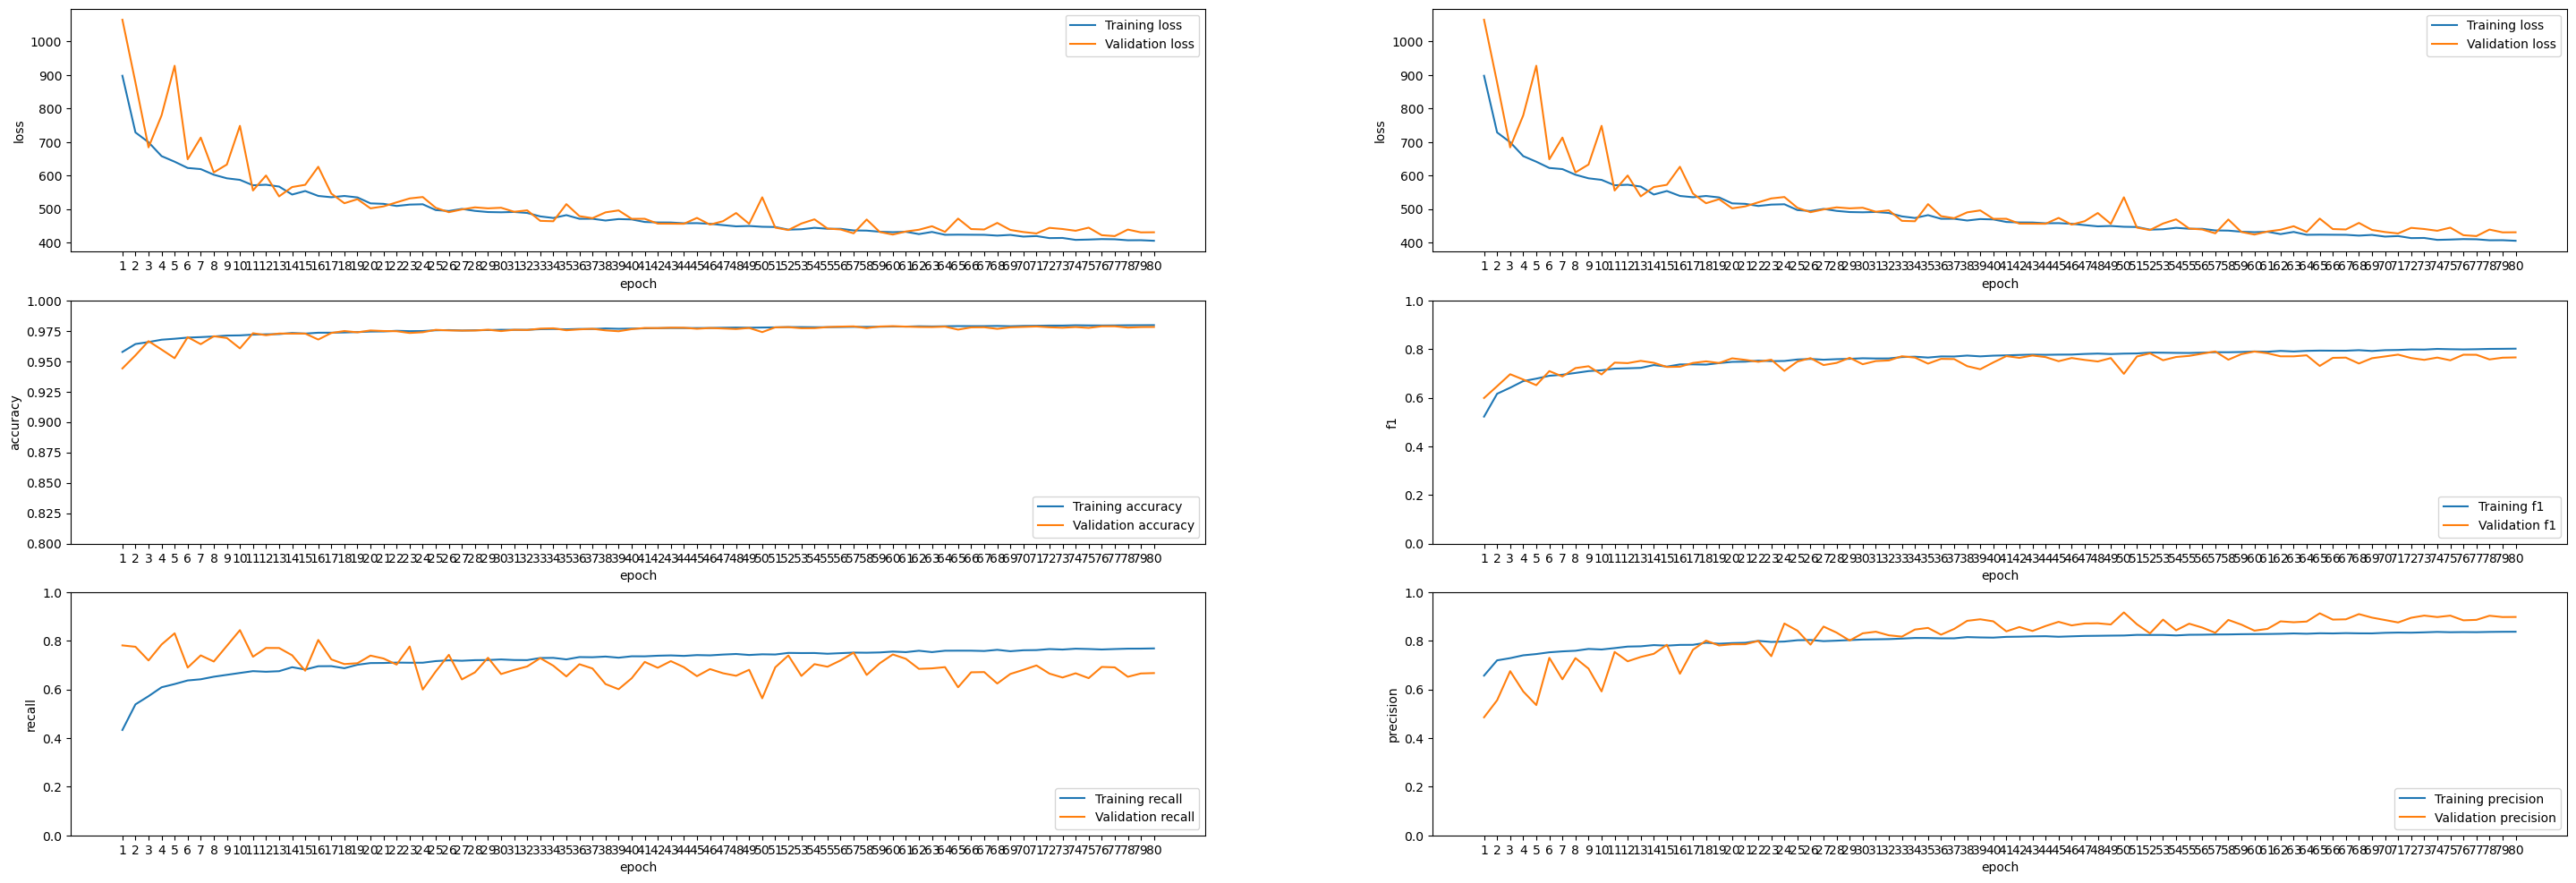

In [6]:
if Model.train_model:
    plot_losses = ["loss", "loss"]
    plot_metrics = ["accuracy", "f1", "recall", "precision"]

    path = os.path.join(Model.Data.paths["FIGURES"], "training.svg")

    plots.plot_training_history(history=history.history, list_of_loss_names=plot_losses,
                                list_of_metric_names=plot_metrics,
                                save=Model.cfg["SAVE"], path=path)

1/1 [==============================] - 0s 417ms/step


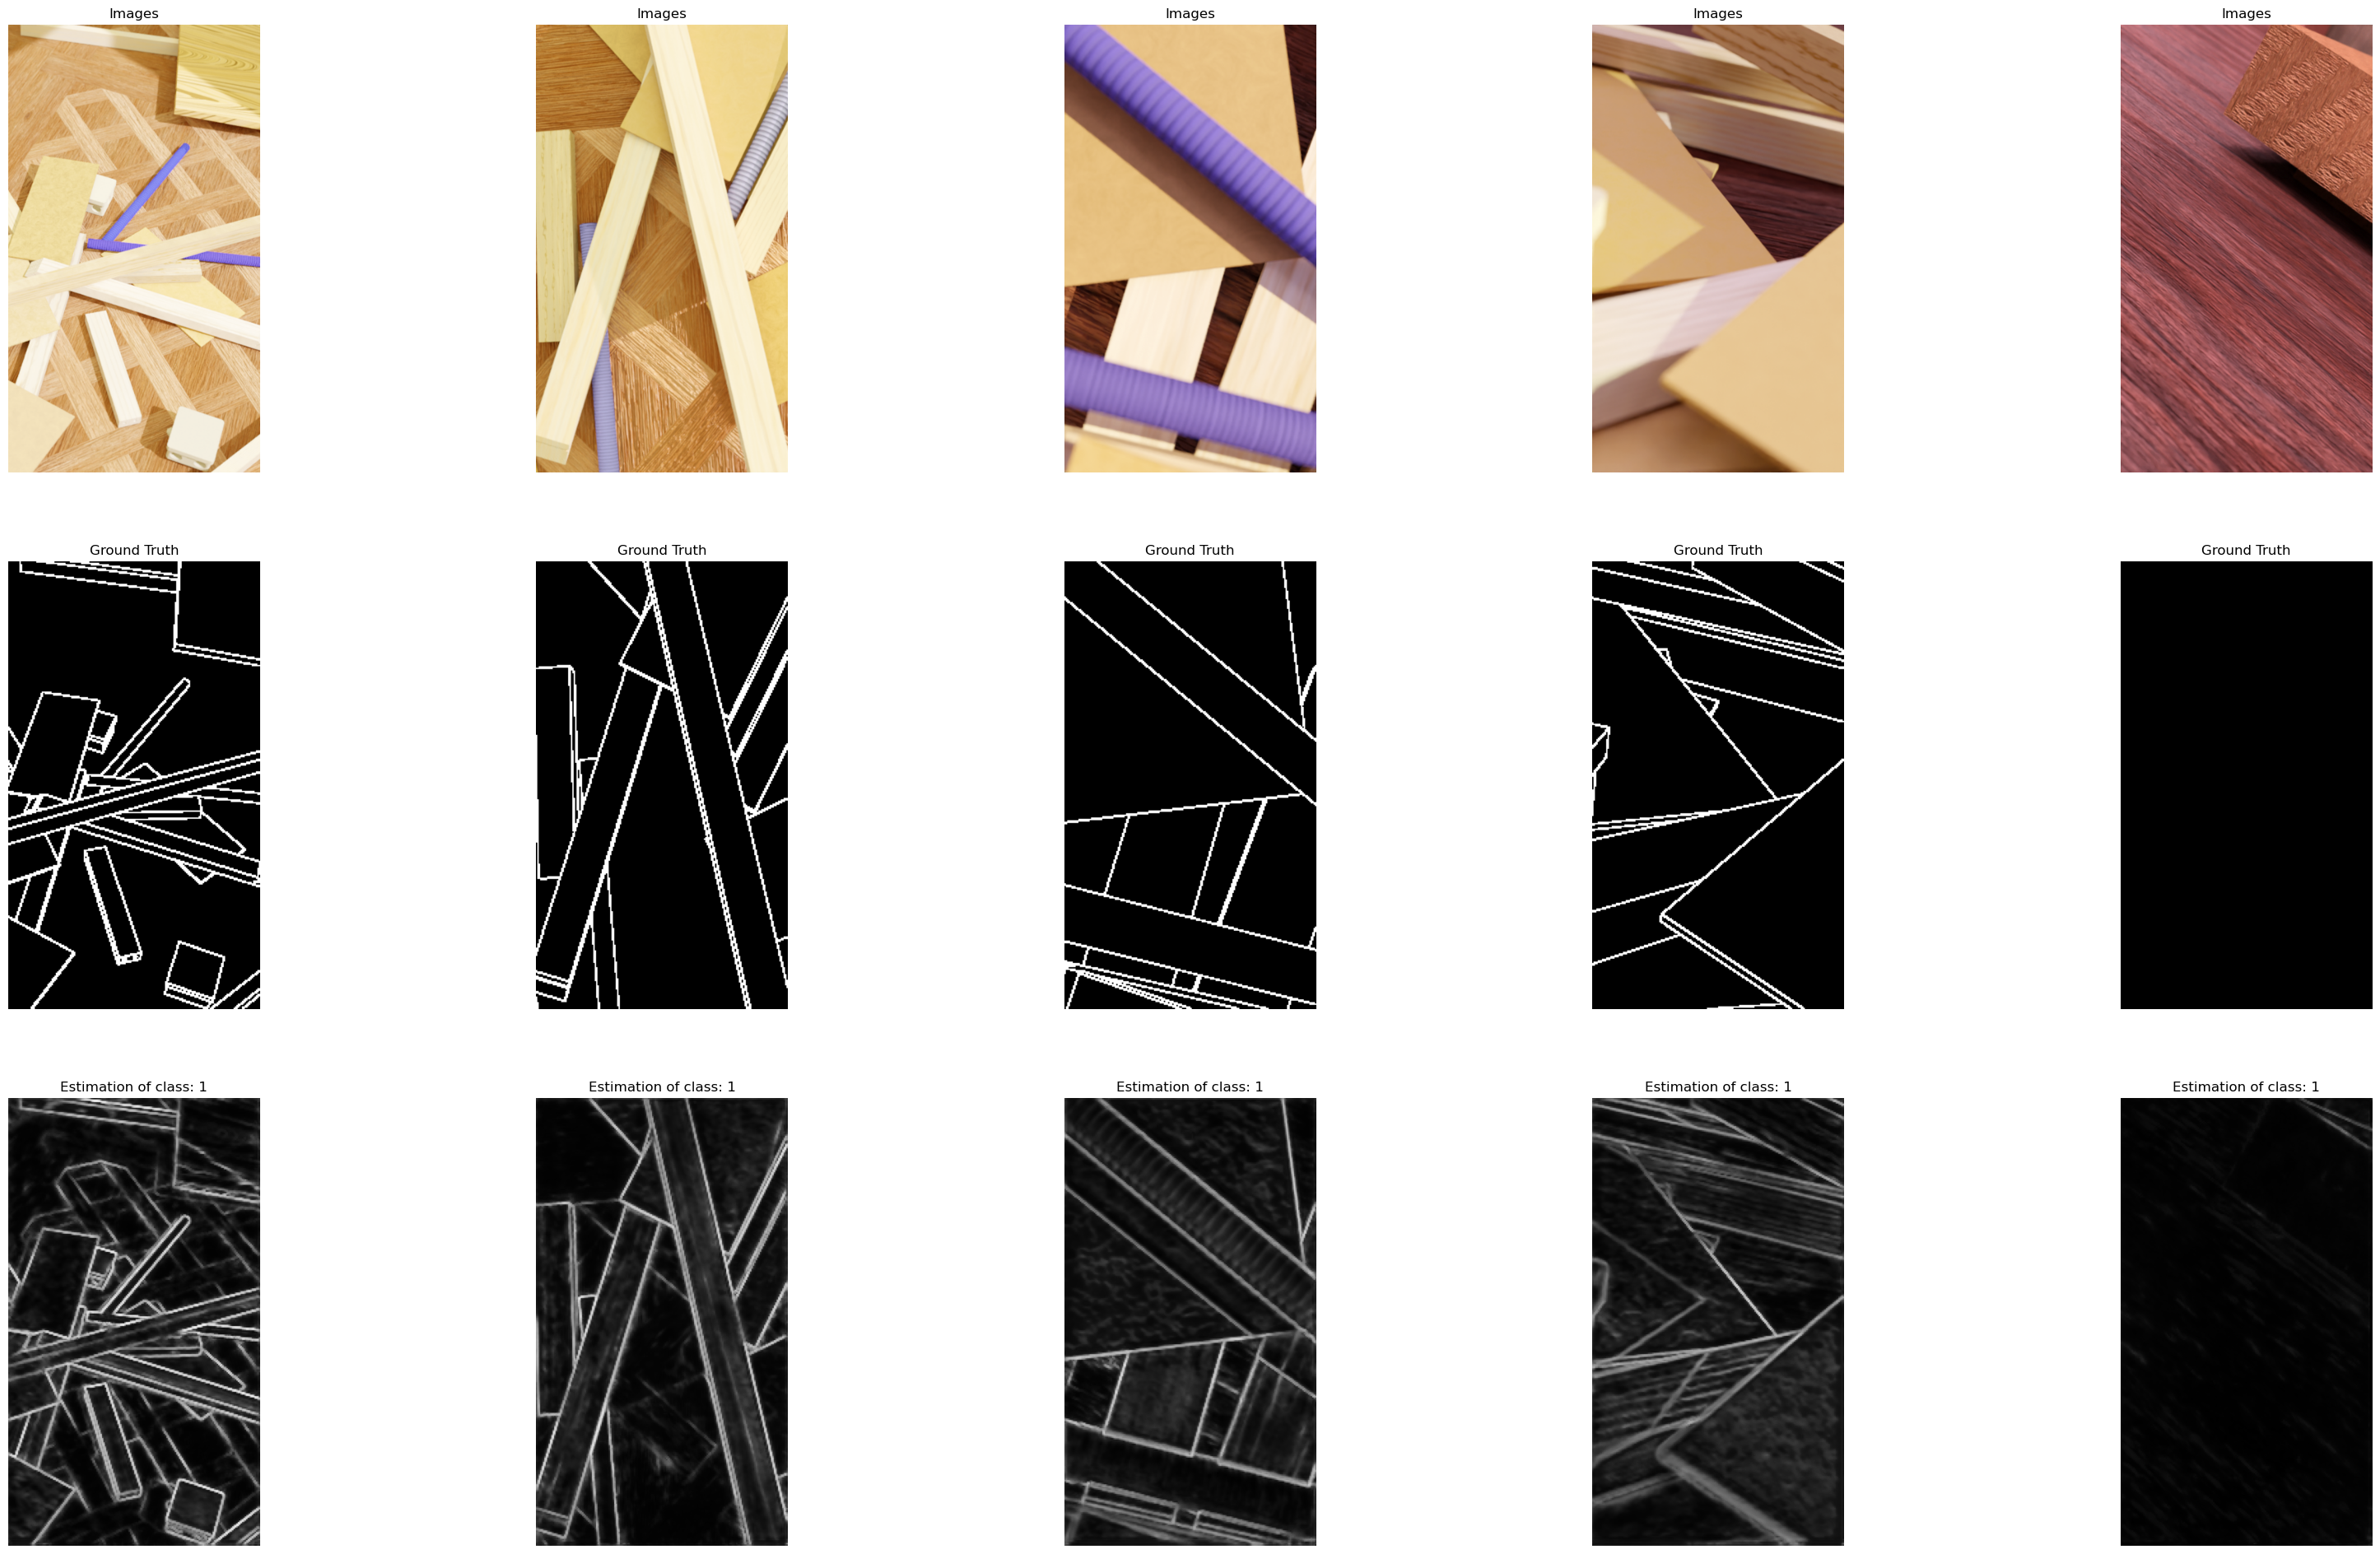

2022-12-12 18:16:22.905825: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [7]:
for inp, out in test_ds.take(1):
    pred = model.predict(inp)
    edge_detection_plots.plot_edges(images=inp['in_img'], labels=out['out_edge'],
                                    predictions=pred,
                                    batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                                    num_classes=DataProcessing.num_classes['edge'])

1/1 [==============================] - 0s 60ms/step


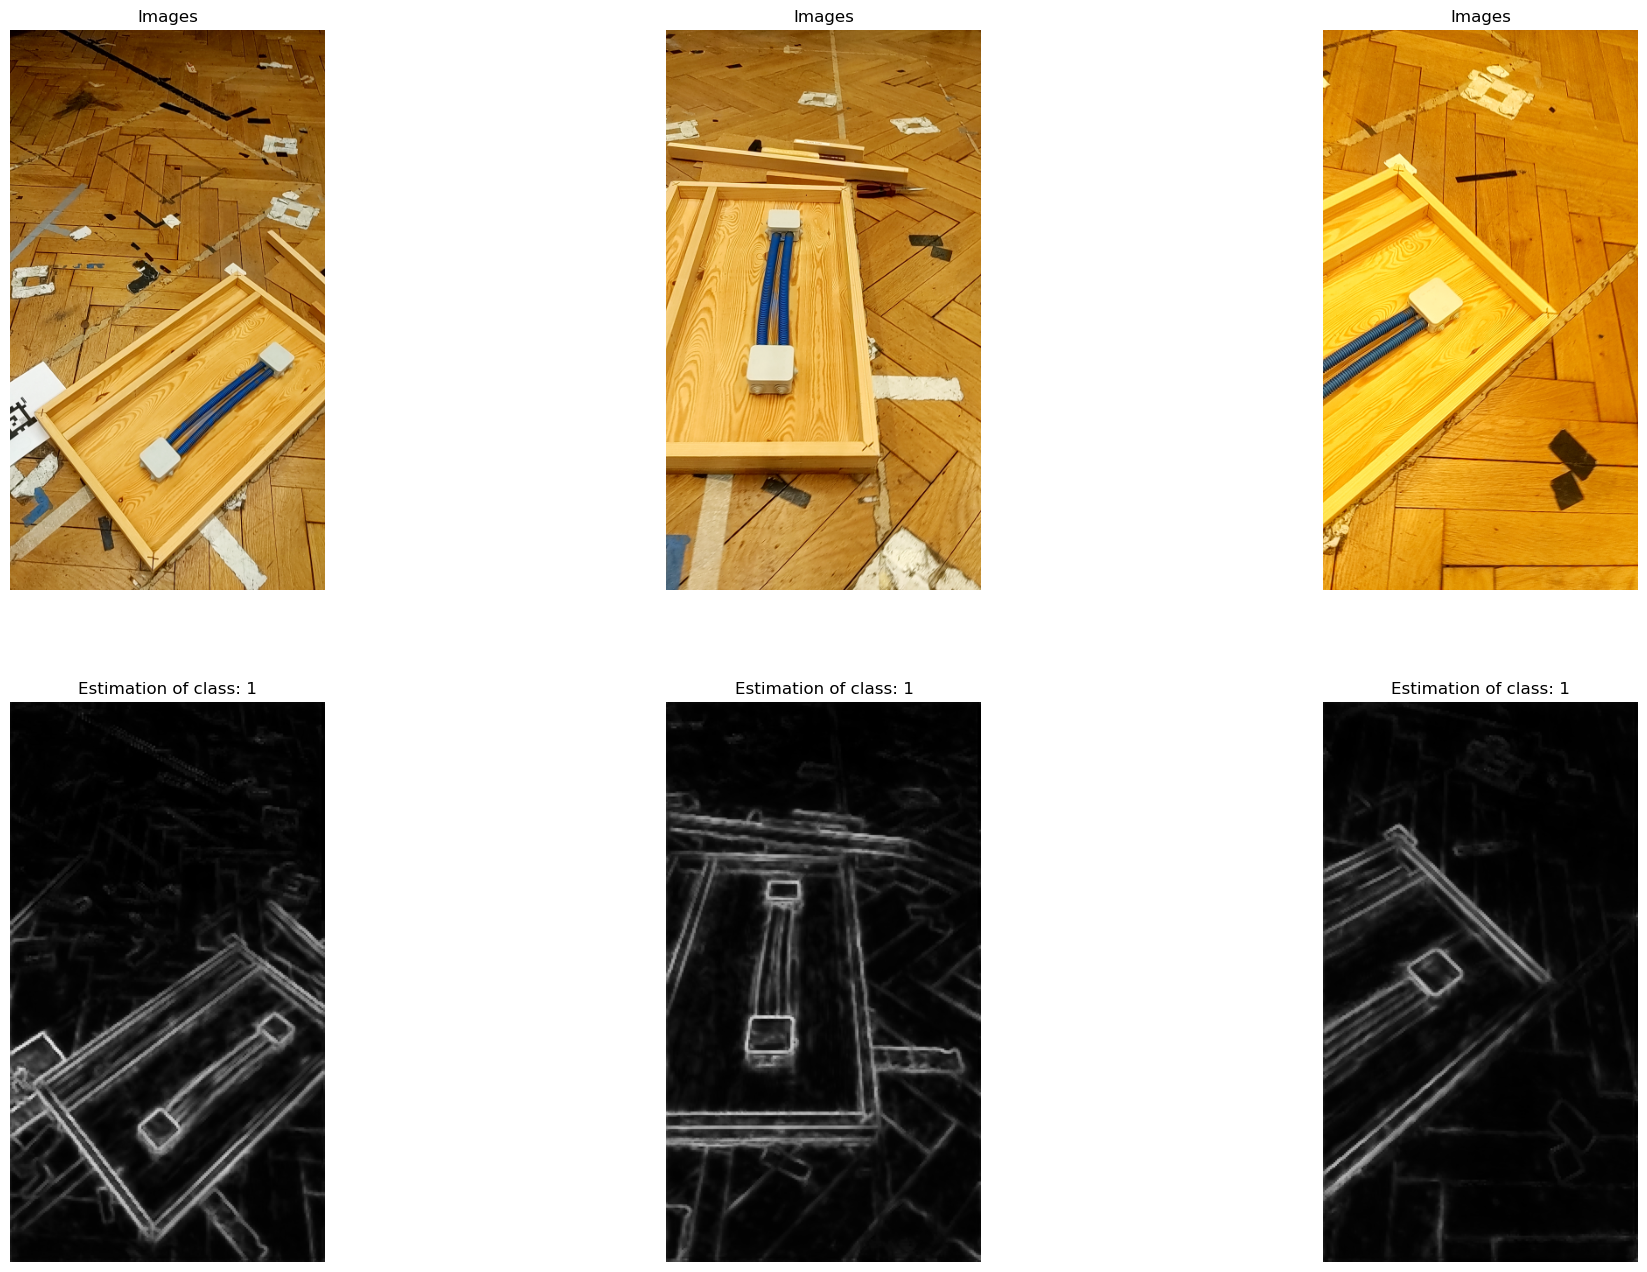

2022-12-12 18:16:23.719177: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [8]:
for inp, out in img_only_ds.take(1):
    pred = model.predict(inp)
    edge_detection_plots.plot_edges(images=inp['in_img'],
                                    predictions=pred,
                                    batch_size=DataProcessing.cfg['IMG_ONLY']['BATCH_SIZE'],
                                    num_classes=DataProcessing.num_classes['edge'])

Max Accuracy Score = 0.977 at 0.400
MF1 = 0.782
MF1_1 = 0.782, ODS_1 = 0.400


[0.4]

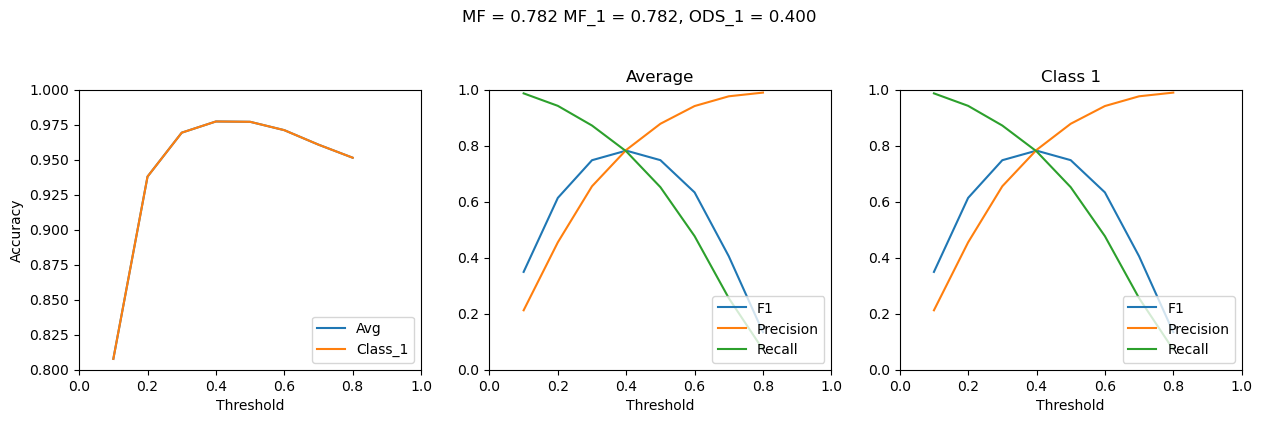

In [9]:
### Maximum F1 Score:
path_metrics_evaluation_plot = os.path.join(Model.Data.paths["FIGURES"],
                                            "threshold_metrics_evaluation_test_ds.svg")

edge_detection_plots.plot_threshold_metrics_evaluation(model=model, ds=test_ds,
                                                       num_classes=DataProcessing.num_classes['edge'],
                                                       classes_displayed_individually=True,
                                                       save=Model.cfg["SAVE"],
                                                       path=path_metrics_evaluation_plot,
                                                       accuracy_y_lim_min=0.8)


In [10]:
if Model.cfg["CONVERT_TO_TFLITE"]:
    Model.convert_model_to_tflite(model)

=== TFLite ModelAnalyzer ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the DEQUANTIZE op takes
tensor #10 as input and produces tensor #98 as output.

Subgraph#0 main(T#0) -> [T#254]
  Op#0 DEQUANTIZE(T#10[]) -> [T#98]
  Op#1 DEQUANTIZE(T#11[]) -> [T#99]
  Op#2 DEQUANTIZE(T#12[]) -> [T#100]
  Op#3 DEQUANTIZE(T#13[]) -> [T#101]
  Op#4 DEQUANTIZE(T#14[]) -> [T#102]
  Op#5 DEQUANTIZE(T#15[]) -> [T#103]
  Op#6 DEQUANTIZE(T#16[]) -> [T#104]
  Op#7 DEQUANTIZE(T#17[]) -> [T#105]
  Op#8 DEQUANTIZE(T#18[]) -> [T#106]
  Op#9 DEQUANTIZE(T#19[]) -> [T#107]
  Op#10 DEQUANTIZE(T#20[]) -> [T#108]
  Op#11 DEQUANTIZE(T#21[]) -> [T#109]
  Op#12 DEQUANTIZE(T#22[]) -> [T#110]
  Op#13 DEQUANTIZE(T#23[]) -> [T#111]
  Op#14 DEQUANTIZE(T#24[]) -> [T#112]
  Op#15 DEQUANTIZE(T#25[]) -> [T#113]
  Op#16 DEQUANTIZE(T#26[]) -> [T#114]
  Op#17 DEQUANTIZE(T#27[]) -> [T#115]
  Op#18 DEQUANTIZE(T#28[]) -> [T#116]
  Op#19 DEQU

2022-12-12 18:16:40.812252: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-12 18:16:40.812279: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-12 18:16:40.812751: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/TFLITE
2022-12-12 18:16:40.828623: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-12 18:16:40.828659: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/TFLITE
2022-12-12 18:16:40.868708: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-12-12 18:16:40.886314: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-12 18